# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [3]:
display(X.shape)
display(y.shape)

(70000, 784)

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [4]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

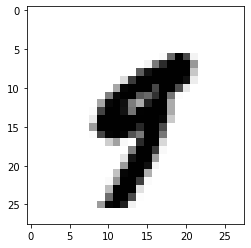

In [5]:
X_sub = X[36000].reshape(28,28)

plt.imshow(X_sub,cmap = plt.cm.binary,interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [6]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [7]:
X_train= X[:60000]
y_train= y[:60000]

X_test= X[60000:]
y_test= y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [8]:
y_train_fives = np.where(y_train!='5', 0, 5)
y_test_fives = np.where(y_test!='5', 0, 5)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train_fives)

/home/david/miniconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [10]:
lr_y_pred = model.predict(X_test)
lr_y_pred

array([0, 0, 0, ..., 0, 5, 0])

### Does the classifier predict correctly the 36000th digit we picked before?

In [11]:
model.predict_proba(X_train)[36000]

array([0.99768139, 0.00231861])

In [12]:
'''yes it does'''

'yes it does'

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [13]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [14]:
never_5_clf.fit(X_train, y_train_fives)

n5_y_pred = never_5_clf.predict(X_test)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [15]:
print(f'Accuracy score of LR model is: {accuracy_score(y_true=y_test_fives, y_pred=lr_y_pred)}')
print(f'Accuracy score of never_5clf model is: {accuracy_score(y_true=y_test_fives, y_pred=n5_y_pred)}')

Accuracy score of LR model is: 0.9779
Accuracy score of never_5clf model is: 0.9108


In [16]:
print(f'Precission score of LR model is: {precision_score(y_true=y_test_fives, y_pred=lr_y_pred, pos_label=5)}')
print(f'Precission score of never_5clf model is: {precision_score(y_true=y_test_fives, y_pred=n5_y_pred, pos_label=5)}')

Precission score of LR model is: 0.9096459096459096
Precission score of never_5clf model is: 0.0


/home/david/miniconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
print(f'Recall score of LR model is: {recall_score(y_true=y_test_fives, y_pred=lr_y_pred, pos_label=5)}')
print(f'Recall score of never_5clf model is: {recall_score(y_true=y_test_fives, y_pred=n5_y_pred, pos_label=5)}')

Recall score of LR model is: 0.8352017937219731
Recall score of never_5clf model is: 0.0


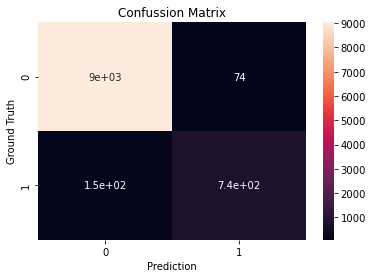

In [18]:
ax = sns.heatmap(confusion_matrix(y_true=y_test_fives, y_pred=lr_y_pred), annot=True)
plt.title('Confussion Matrix')
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')
plt.show()

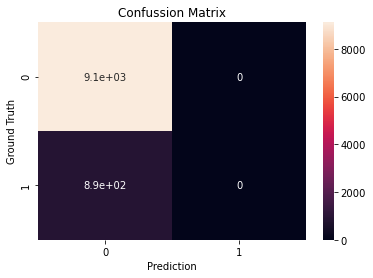

In [19]:
ax = sns.heatmap(confusion_matrix(y_true=y_test_fives, y_pred=n5_y_pred), annot=True)
plt.title('Confussion Matrix')
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')
plt.show()

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

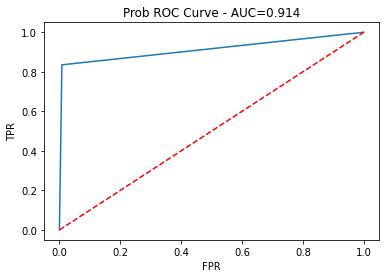

In [20]:
fpr, tpr, thresholds = roc_curve(y_test_fives, lr_y_pred,pos_label=5)
a = roc_auc_score(y_test_fives, lr_y_pred)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'Prob ROC Curve - AUC={a:.3f}')
plt.show();

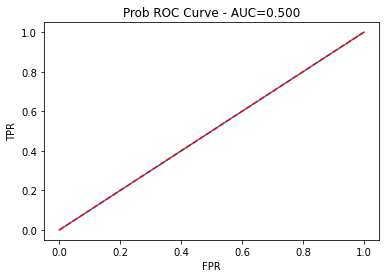

In [21]:
fpr, tpr, thresholds = roc_curve(y_test_fives, n5_y_pred,pos_label=5)
a = roc_auc_score(y_test_fives, n5_y_pred)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'Prob ROC Curve - AUC={a:.3f}')
plt.show();

### Now find the roc_auc_score for each. 

In [22]:
print(f'roc_auc_score of LR model is: {roc_auc_score(y_test_fives, lr_y_pred)}')
print(f'roc_auc_score of never_5clf model is: {roc_auc_score(y_test_fives, n5_y_pred)}')

roc_auc_score of LR model is: 0.9135385341029717
roc_auc_score of never_5clf model is: 0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

In [23]:
'LR model perfoms better'

'LR model perfoms better'